In [4]:
import cv2

image= cv2.imread('10.jpg')
original_image= image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 50,200)


contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)



for (i,c) in enumerate(sorted_contours):
    x,y,w,h= cv2.boundingRect(c)
    
    cropped_contour= original_image[y:y+h, x:x+w]
    image_name= "kist/output_shape_number_" + str(i+1) + ".jpg"
    cv2.imwrite(image_name, cropped_contour)
    readimage= cv2.imread(image_name)
    #cv2.imshow('Image', readimage)
    #cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [2]:
import skimage

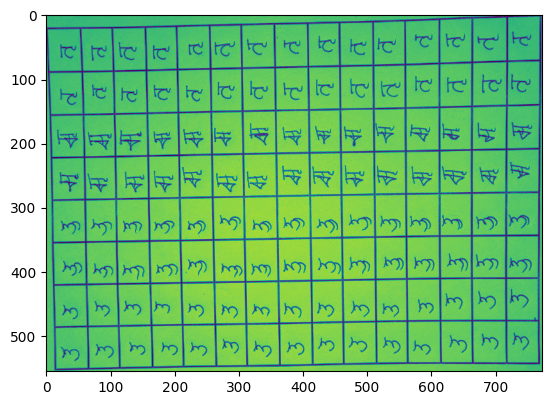

In [7]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
# Load the image and convert it to grayscale
img = cv2.imread('output_shape_number_11.jpg', 0)
plt.imshow(img)

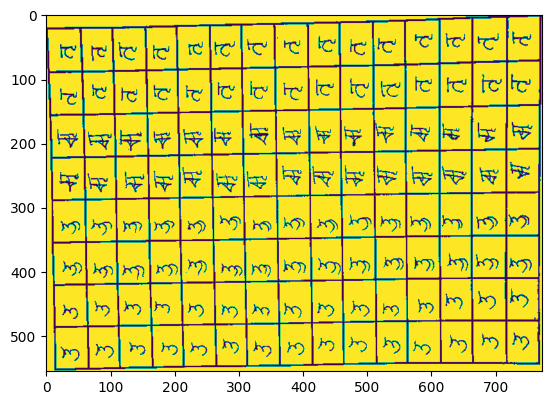

In [8]:
# Apply thresholding to convert to binary image
threshold, img_bin = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(img_bin)

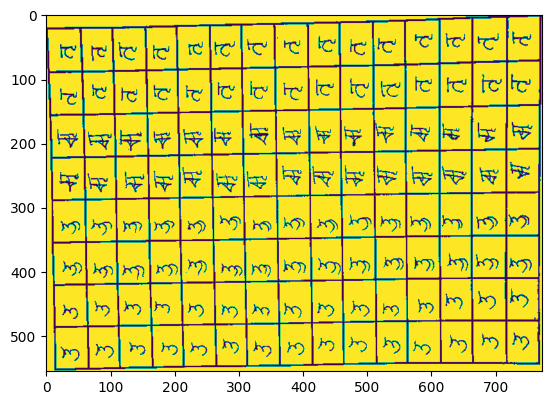

In [9]:
# Use morphological operations to remove noise
kernel = np.ones((1,1), np.uint8)
img_bin = cv2.dilate(img_bin, kernel, iterations=1)
plt.imshow(img_bin)

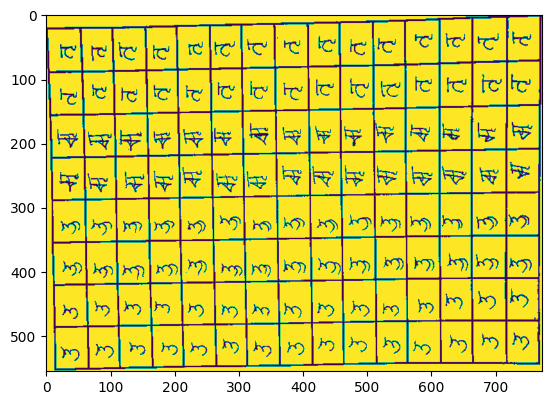

In [10]:
img_bin = cv2.erode(img_bin, kernel, iterations=1)
plt.imshow(img_bin)

In [11]:
# Find contours in the binary image
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

126

In [80]:
# Iterate through each contour and extract the bounding box
i = 1238
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    roi = img[y:y+h, x:x+w]
    
    # Save the letter image to a separate file
    cv2.imwrite("test/letter_{}.png".format(i), roi)
    i += 1

In [81]:
import cv2
import os

# Set the path to the folder containing the images
folder_path = 'test'

# Set the target size for the images
target_size = (50, 50)

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    # Load the image
    img = cv2.imread(os.path.join(folder_path, filename))
    # Resize the image
    resized_img = cv2.resize(img, target_size)
    # Save the resized image
    cv2.imwrite(os.path.join(folder_path, filename), resized_img)


In [104]:
import os
import numpy as np
from sklearn.cluster import KMeans
from skimage import io

# Load all images in the folder
image_folder = 'test'
images = []
for filename in os.listdir(image_folder):
    img = io.imread(os.path.join(image_folder, filename))
    images.append(img.ravel())

# Convert the list of images into a numpy array
images = np.array(images)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(images)

# Get the labels for each image
labels = kmeans.labels_

/home/limsim/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [105]:
labels

array([3, 0, 0, ..., 0, 4, 3], dtype=int32)

In [106]:
images.shape

(1170, 7500)

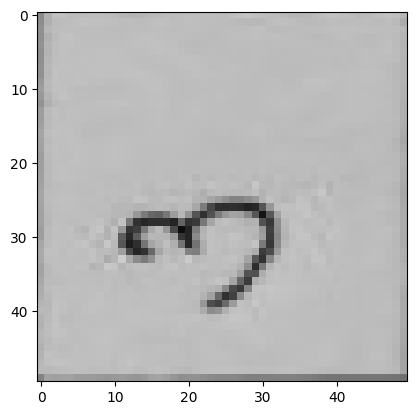

In [107]:
plt.imshow(images[2].reshape(50,50,3))

In [108]:
images[1].shape

(7500,)

In [109]:
# Create a folder for each label
for label in range(14):
    label_folder = 'label_' + str(label)
    if not os.path.exists(label_folder):
        os.makedirs(label_folder)

# Move each image to its corresponding folder
for i, filename in enumerate(os.listdir(image_folder)):
    src = os.path.join(image_folder, filename)
    dst = os.path.join('label_' + str(labels[i]), filename)
    os.rename(src, dst)

In [100]:
# another

In [110]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=10)
labels = agg_clustering.fit_predict(images)

In [111]:
# Create a folder for each label
for label in range(14):
    label_folder = 'label_' + str(label)
    if not os.path.exists(label_folder):
        os.makedirs(label_folder)

# Move each image to its corresponding folder
for i, filename in enumerate(os.listdir(image_folder)):
    src = os.path.join(image_folder, filename)
    dst = os.path.join('label_' + str(labels[i]), filename)
    os.rename(src, dst)

# each folder

In [103]:
import os
import numpy as np
from sklearn.cluster import KMeans
from skimage import io

# Load all images in the folder
image_folder = 'label_0'
images = []
for filename in os.listdir(image_folder):
    img = io.imread(os.path.join(image_folder, filename))
    images.append(img.ravel())

# Convert the list of images into a numpy array
images = np.array(images)

from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=14)
labels = agg_clustering.fit_predict(images)

# Get the labels for each image
labels = kmeans.labels_

# Create a folder for each label
for label in range(14):
    label_folder = image_folder + 'label_' + str(label)
    if not os.path.exists(label_folder):
        os.makedirs(label_folder)

# Move each image to its corresponding folder
for i, filename in enumerate(os.listdir(image_folder)):
    src = os.path.join(image_folder, filename)
    dst = os.path.join('label_' + str(labels[i]), filename)
    os.rename(src, dst)


In [ ]:
# moving 